This example is mainly for data cleaning and plotting purpose

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import numpy as np

import seaborn as sns
color = sns.color_palette()
sns.set(rc={'figure.figsize':(25, 15)})

import plotly

import sys
import os

In [3]:
df_feat = pd.read_csv("./googleplaystore.csv")

In [4]:
df_feat.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
print( df_feat.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None


Now check the examples with no ratings

In [6]:
# df_feat.loc[df_feat["Rating"].isnull()]

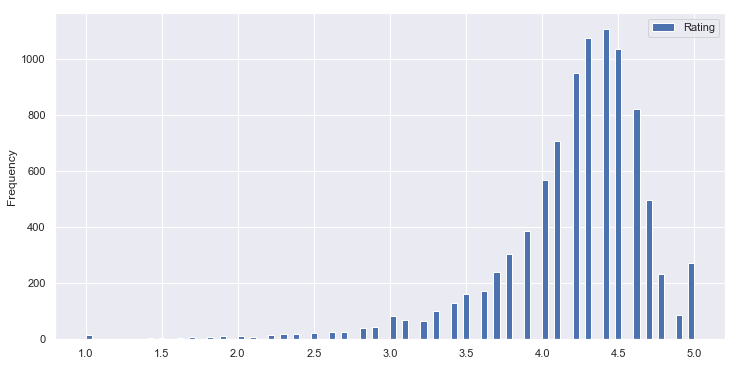

In [7]:
# plt.figure(figsize=(12,6))
# sns.distplot(df_feat["Rating"], kde = True)

# df_feat["Rating"].value_counts()

df_feat.loc[df_feat["Rating"] <= 5.].plot(kind="hist", bins = 100, figsize=(12, 6))

In [8]:
df_feat.drop_duplicates(subset= "App", inplace= True)

# Here we do not want to blindly drop any NA
df_feat.dropna(subset= ["Android Ver"], inplace= True)

# only keep these
df_feat = df_feat[df_feat["Installs"] != "Free"]

In [9]:
# data cleaning
df_feat["Installs"] = df_feat["Installs"].apply(lambda x: x.replace("+", "") if "+" in str(x) else x)
df_feat["Installs"] = df_feat["Installs"].apply(lambda x: x.replace(",", "") if "," in str(x) else x)
df_feat["Installs"] = df_feat["Installs"].apply(lambda x: int(x))

In [10]:
df_feat[df_feat["Rating"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,100000,Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,100000,Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,50000,Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,100000,Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,10000,Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
130,Recipes and tips for losing weight,BEAUTY,NaN,35,3.1M,10000,Free,0,Everyone 10+,Beauty,"December 11, 2017",2.0,3.0 and up
134,"Lady adviser (beauty, health)",BEAUTY,NaN,30,9.9M,10000,Free,0,Mature 17+,Beauty,"January 24, 2018",3.0,3.0 and up
163,Anonymous caller detection,BOOKS_AND_REFERENCE,NaN,161,2.7M,10000,Free,0,Everyone,Books & Reference,"July 13, 2018",1.0,2.3 and up
180,SH-02J Owner's Manual (Android 8.0),BOOKS_AND_REFERENCE,NaN,2,7.2M,50000,Free,0,Everyone,Books & Reference,"June 15, 2018",3.0,6.0 and up
185,URBANO V 02 instruction manual,BOOKS_AND_REFERENCE,NaN,114,7.3M,100000,Free,0,Everyone,Books & Reference,"August 7, 2015",1.1,5.1 and up


In [11]:
df_feat.dropna(subset= ["Rating"], inplace= True)

In [12]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8194 entries, 0 to 10840
Data columns (total 13 columns):
App               8194 non-null object
Category          8194 non-null object
Rating            8194 non-null float64
Reviews           8194 non-null object
Size              8194 non-null object
Installs          8194 non-null int64
Type              8194 non-null object
Price             8194 non-null object
Content Rating    8194 non-null object
Genres            8194 non-null object
Last Updated      8194 non-null object
Current Ver       8190 non-null object
Android Ver       8194 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 896.2+ KB


In [13]:
df_feat.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [49]:
# need to convert some data from str to numbers
df_feat.describe()

,Rating,Reviews,Size,Installs,Price
count,8194.000000,8.194000e+03,7025.000000,8.194000e+03,8194.000000
mean,4.173175,2.553137e+05,21.758756,9.167325e+06,1.037956
std,0.536672,1.985832e+06,22.728166,5.825780e+07,16.859934
min,1.000000,1.000000e+00,0.008500,1.000000e+00,0.000000
25%,4.000000,1.260000e+02,4.900000,1.000000e+04,0.000000
50%,4.300000,3.009500e+03,13.000000,1.000000e+05,0.000000
75%,4.500000,4.383900e+04,31.000000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


In [15]:
df_feat["Reviews"] = df_feat["Reviews"].apply(lambda x: int(x))

df_feat["Size"] = df_feat["Size"].apply(lambda x: str(x).replace("Varies with device", "NaN") if "Varies with device" in str(x) else x)
# unit :MB
df_feat["Size"] = df_feat["Size"].apply(lambda x: str(x).replace("M", "") if "M" in str(x) else x)
df_feat["Size"] = df_feat["Size"].apply(lambda x: str(x).replace(".", "") if "M" in str(x) else x)

df_feat["Size"] = df_feat["Size"].apply(lambda x: float(x.replace("k", "")) * 1e-3 if "k" in x else x)

df_feat["Size"] = df_feat["Size"].apply(lambda x: float(x))

In [16]:
df_feat.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [17]:
df_feat["Type"].value_counts()

Free    7591
Paid     603
Name: Type, dtype: int64

In [18]:
df_feat["Price"] = df_feat["Price"].apply(lambda x: str(x).replace("$", "") if "$" in str(x) else x)
df_feat["Price"] = df_feat["Price"].apply(lambda x: float(x))

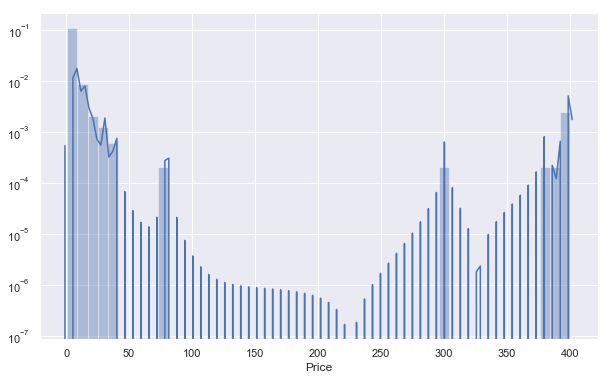

In [47]:
# df_feat["Price"].value_counts()

df_feat_ = df_feat.loc[ df_feat["Price"] > 0 ]
# df_feat_["Price"].value_counts()

fig_ = plt.figure(figsize=(10, 6))
sns.distplot(df_feat_["Price"], kde = True )
plt.yscale("log")

In [48]:
df_feat["Content Rating"].value_counts()

Everyone           6616
Teen                912
Mature 17+          357
Everyone 10+        305
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [50]:
df_feat["Reviews"] = df_feat["Reviews"].apply(lambda x: int(x))

In [51]:
df_feat.describe()

,Rating,Reviews,Size,Installs,Price
count,8194.000000,8.194000e+03,7025.000000,8.194000e+03,8194.000000
mean,4.173175,2.553137e+05,21.758756,9.167325e+06,1.037956
std,0.536672,1.985832e+06,22.728166,5.825780e+07,16.859934
min,1.000000,1.000000e+00,0.008500,1.000000e+00,0.000000
25%,4.000000,1.260000e+02,4.900000,1.000000e+04,0.000000
50%,4.300000,3.009500e+03,13.000000,1.000000e+05,0.000000
75%,4.500000,4.383900e+04,31.000000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000
